ERROR! Session/line number was not unique in database. History logging moved to new session 16


,user_id,contact_id,relationship,channel,sent_at,message,positive,negative,neutral,compound,word_count
0,10,35,Ex,text_message,2013-01-28 07:31:44,hey Aldo! I was just thinking about you the ot...,0.000,0.558,0.442,-0.5848,36
1,10,35,Ex,text_message,2013-01-28 07:31:44,it would be great to catch up sometime soon!,0.274,0.070,0.655,0.7604,9
2,10,35,Ex,text_message,2013-01-28 11:42:34,that would be great! my plans are a bit up in ...,0.168,0.039,0.793,0.6213,20
3,10,35,Ex,text_message,2013-01-29 00:16:32,"Great! And yes, same place",0.000,0.000,1.000,0.0000,5
4,10,35,Ex,text_message,2013-01-29 00:18:40,yeah that'd be great!,0.259,0.000,0.741,0.5994,4
5,10,35,Ex,text_message,2013-01-29 00:20:48,great! I'll think about where to go -- I don't...,0.309,0.000,0.691,0.5540,32
6,10,35,Ex,text_message,2013-01-29 00:25:04,Sounds good!,0.333,0.000,0.667,0.4588,2
7,10,35,Ex,text_message,2013-02-04 03:49:52,hey aldo! still up for a bite tonight? was thi...,0.000,0.110,0.890,-0.4753,16
8,10,35,Ex,text_message,2014-02-10 04:08:42,hey aldo! thought of you the other day and the...,0.162,0.091,0.747,0.4036,35
9,10,16787,Ex,text_message,2011-05-09 20:07:17,Hey its marcelo! How's your night?,0.000,0.093,0.907,-0.5423,6


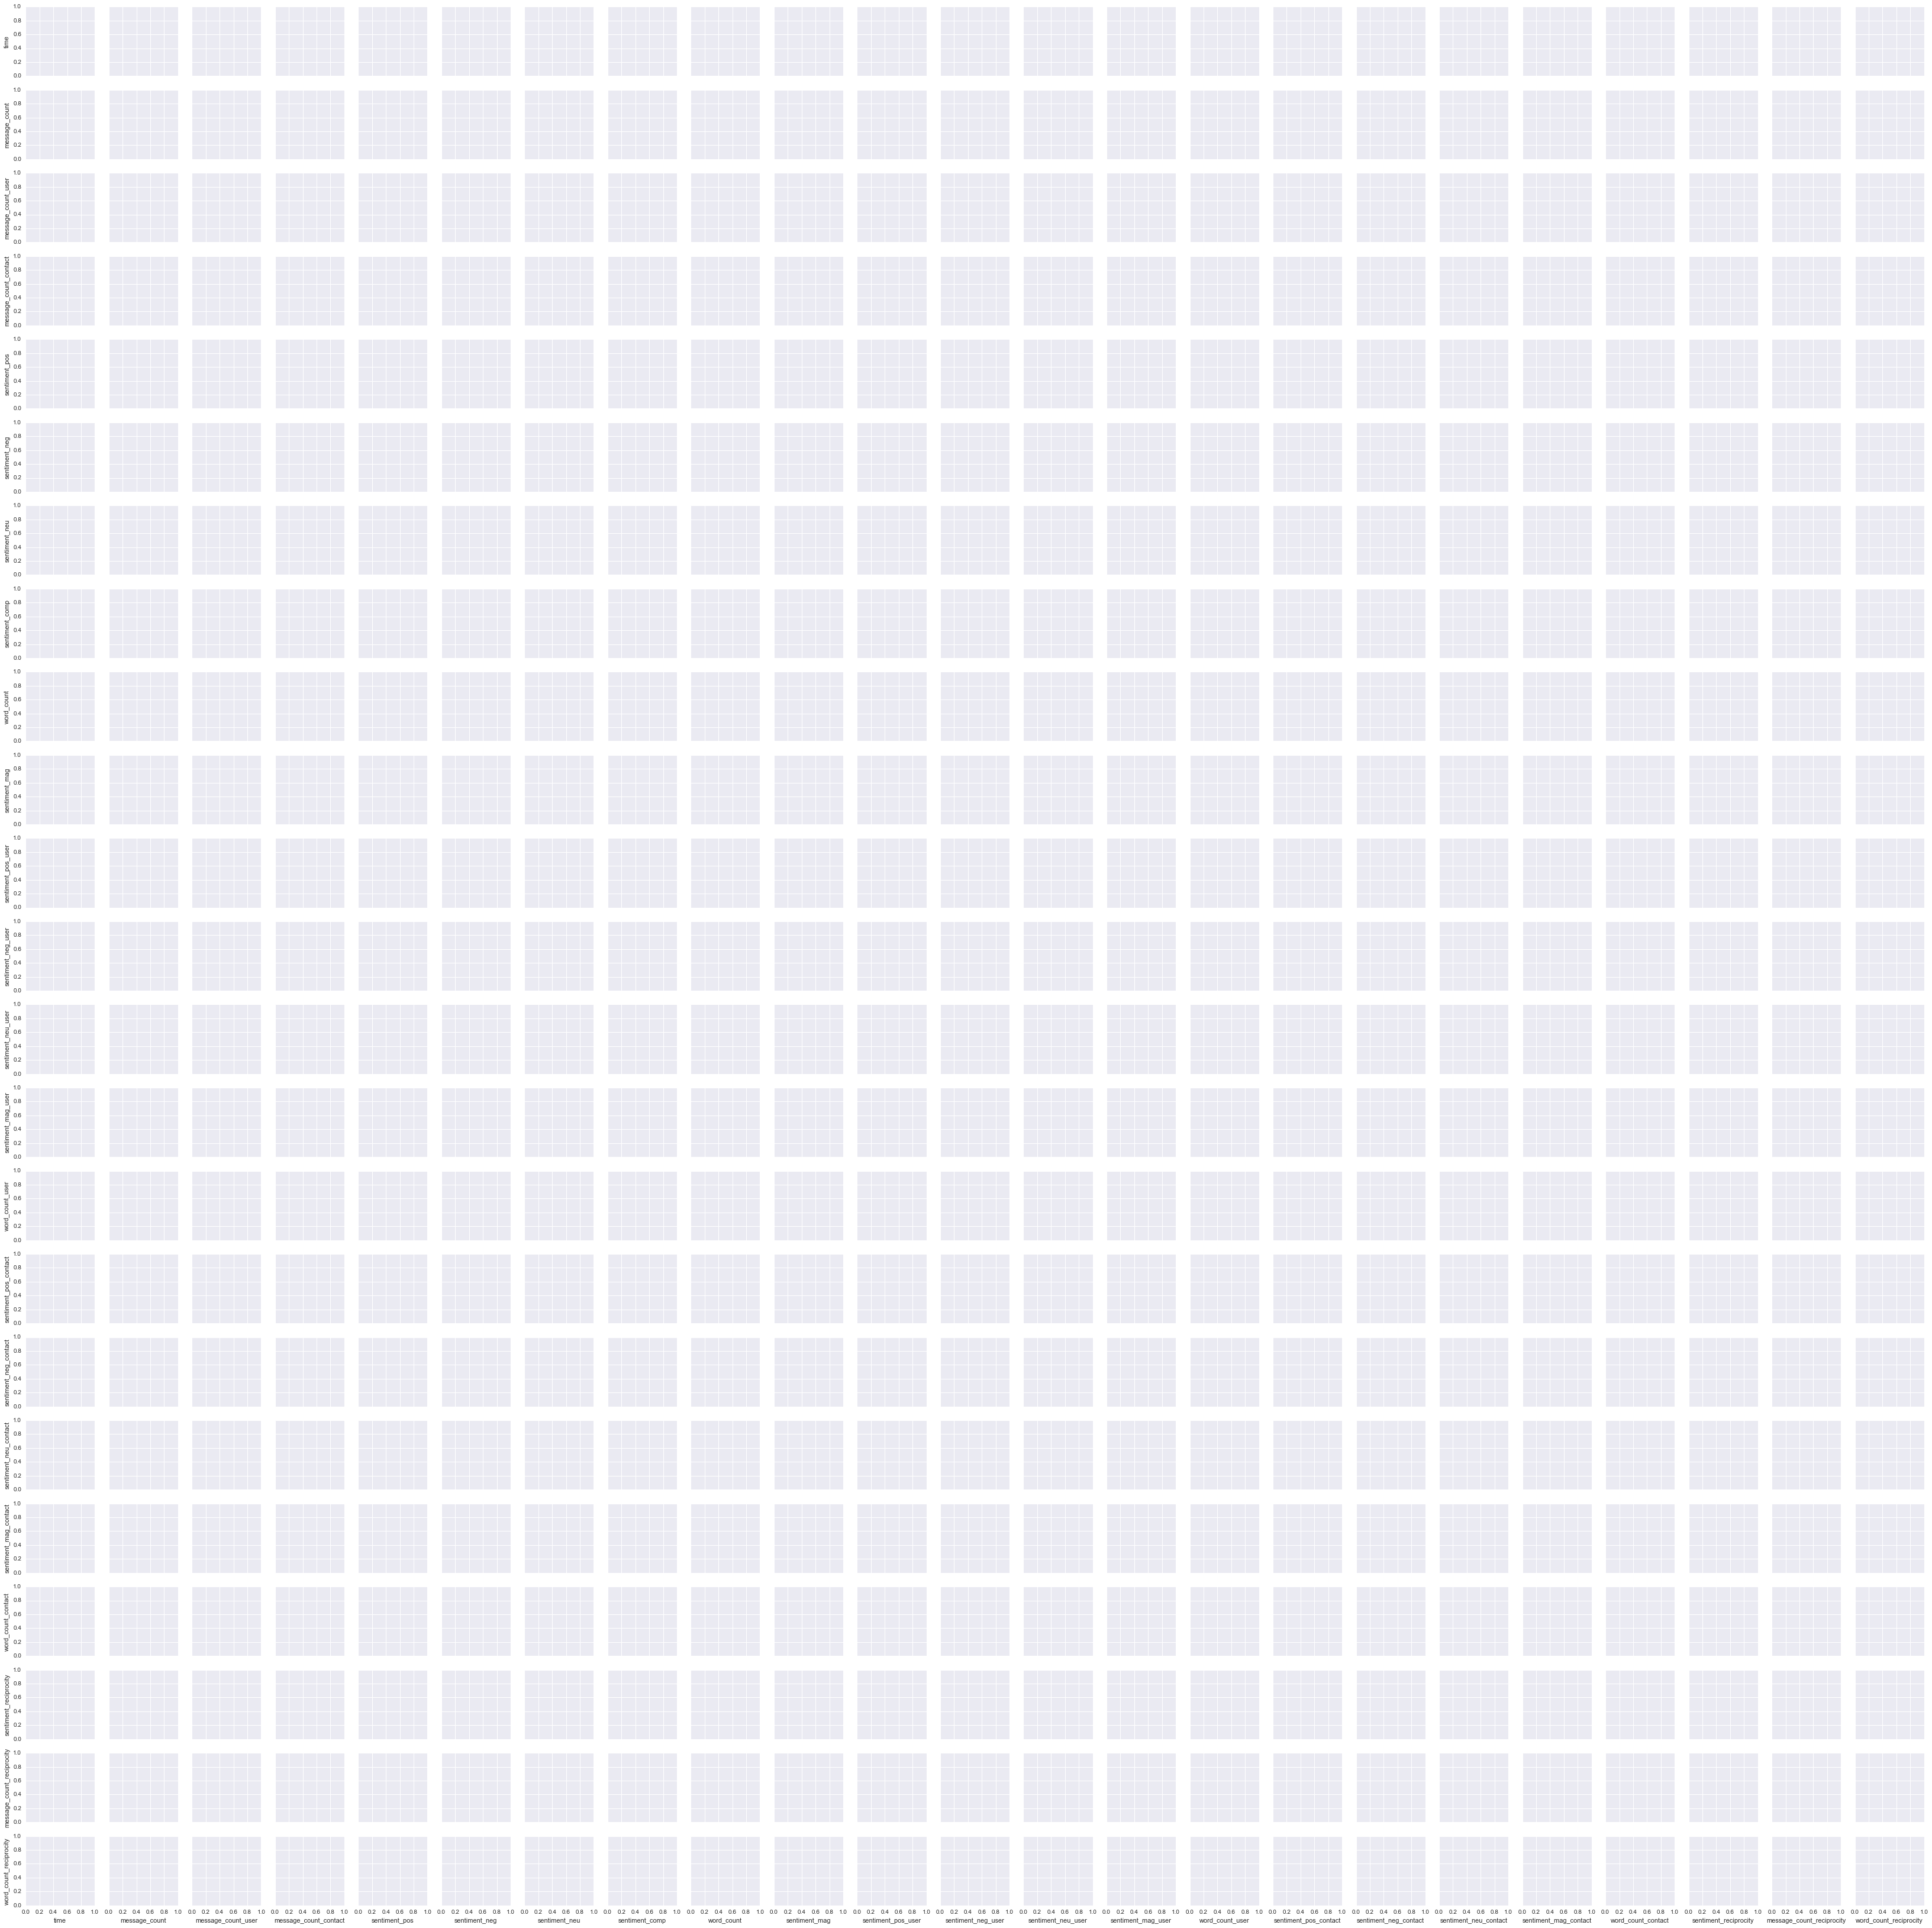

In [9]:
import pandas as pd
import sys
import os
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

query_df = pd.read_csv("../data/textsentiment.csv")

query_df

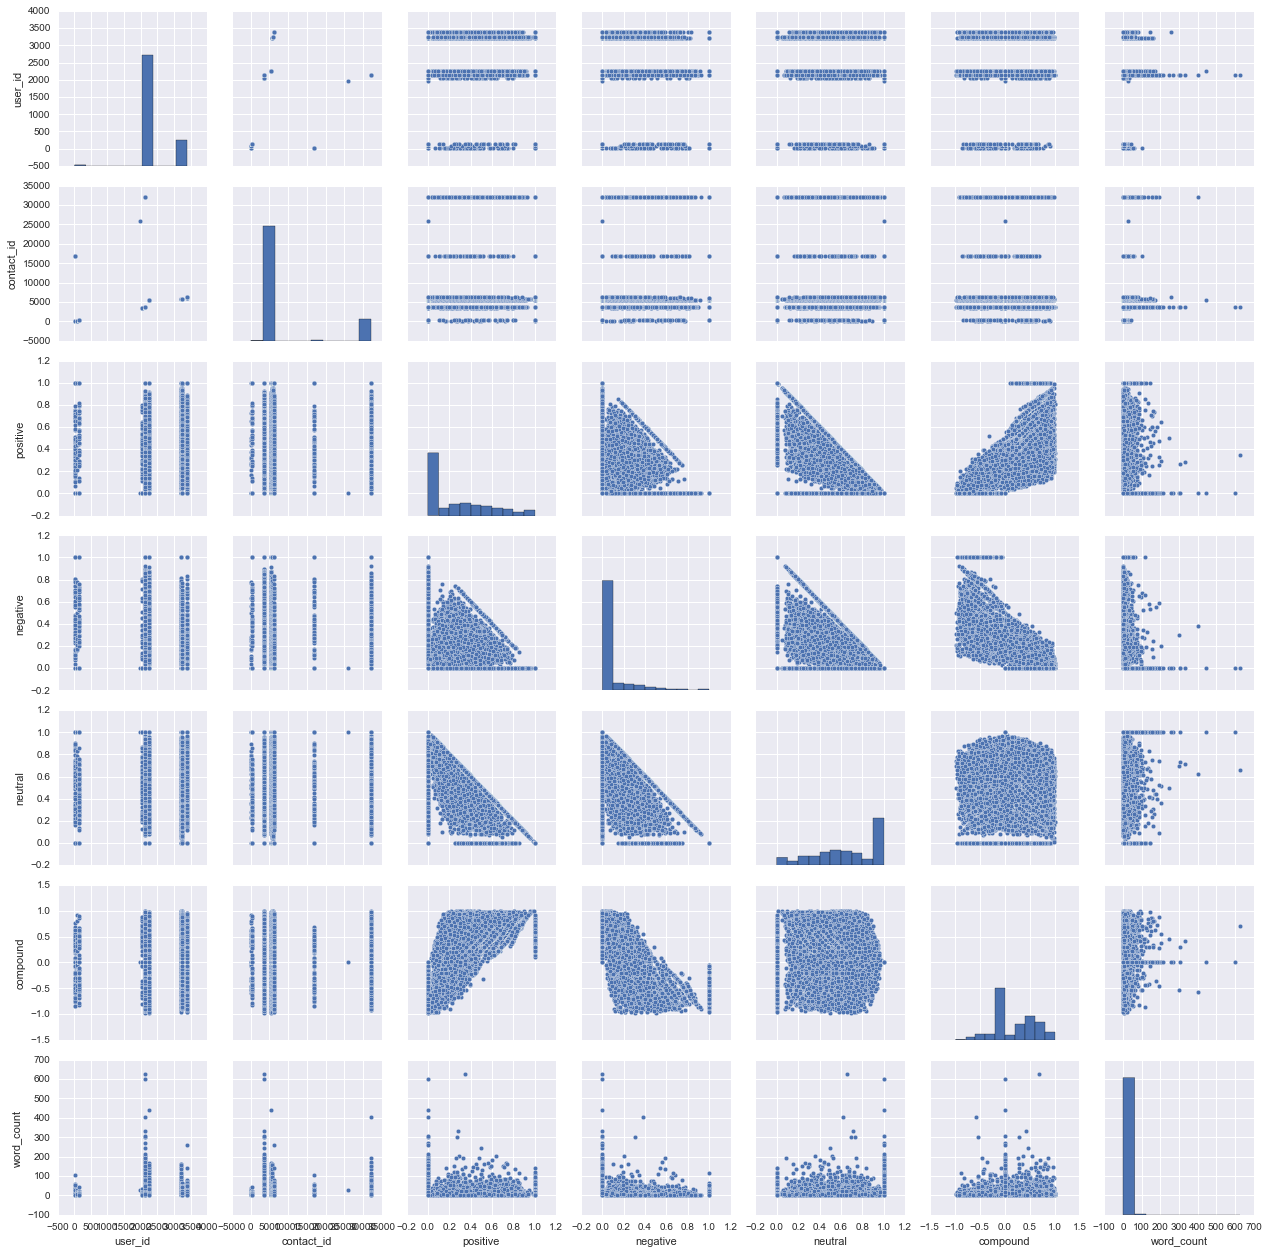

In [10]:
%matplotlib inline  

query_df.dropna(inplace=True)
g = sns.pairplot(query_df)
plt.show()

nothing to be done


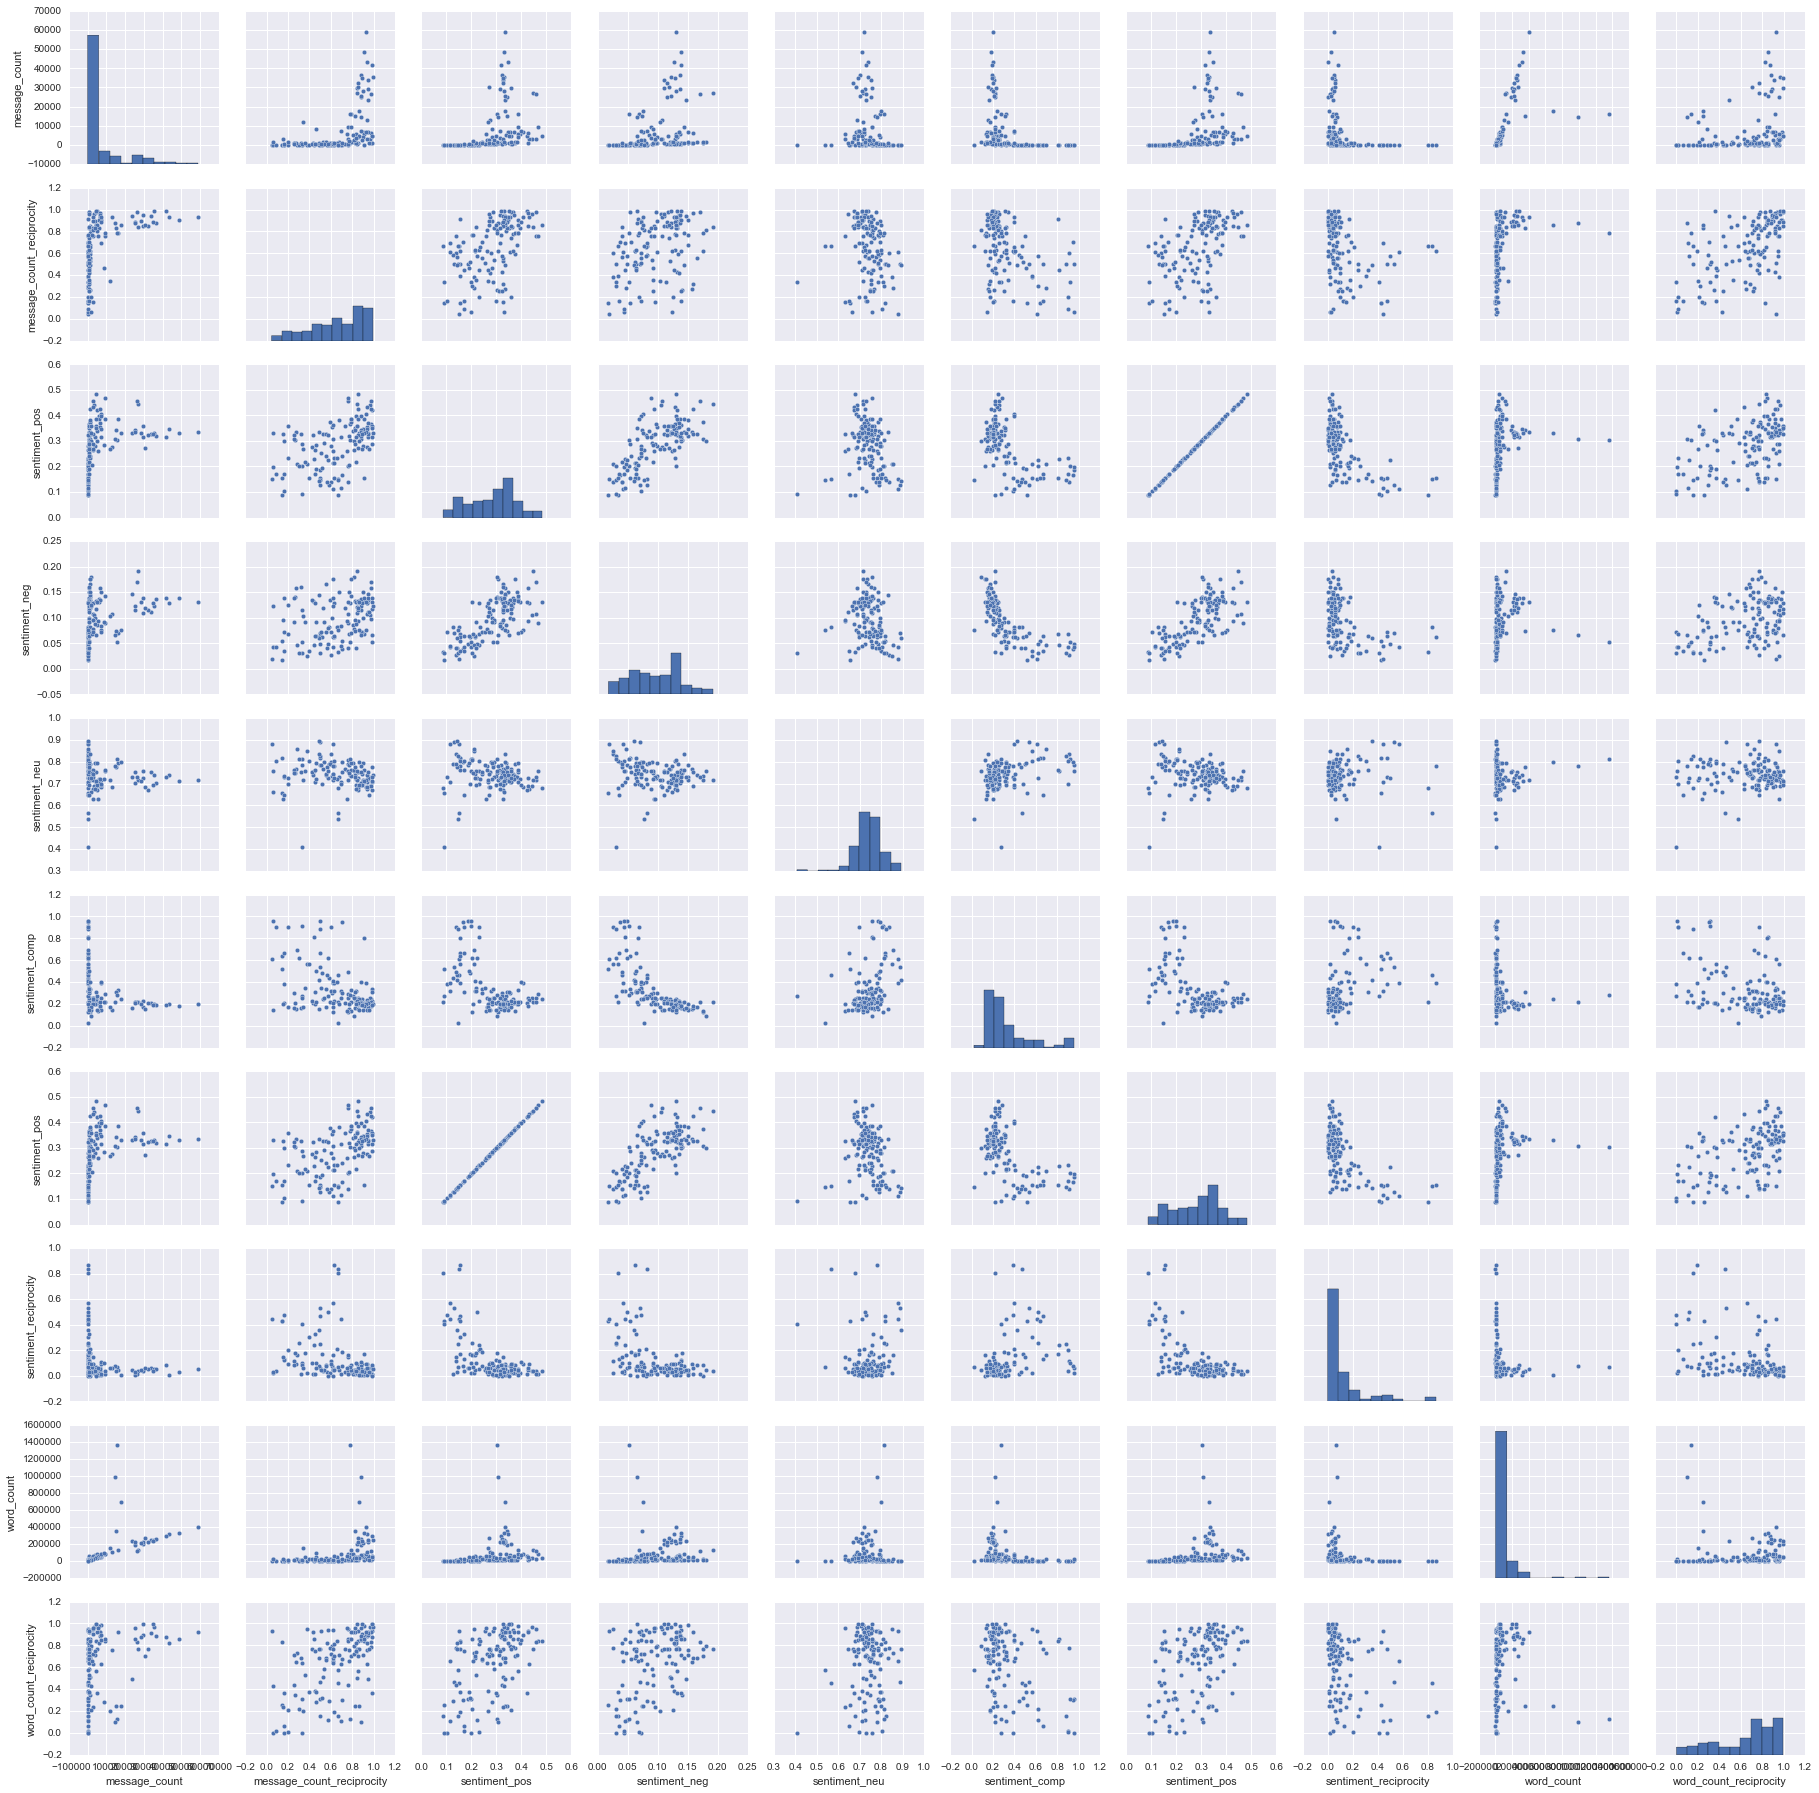

In [13]:
import resampler

df = pd.read_pickle('../data/result')

    # setup pandas dataframe. It's not necessary, so replace this with what ever data source you have.

    # TODO split off dataframe by partner type

b = [len(str(x).split()) for x in df['message']]
df['word_count'] = b

df = df[df['relationship'] == "Ex"]

    #TODO make sure the analysis starts at 0, i.e. remove [1:]
    
new_df = resampler.resampler_dataframe(df, "M")

new_df.dropna(inplace=True)
s = sns.pairplot(new_df, vars=["message_count","message_count_reciprocity","sentiment_pos","sentiment_neg","sentiment_neu","sentiment_comp","sentiment_pos","sentiment_reciprocity", "word_count","word_count_reciprocity"])
plt.show()